In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore

In [2]:
dataset=pd.read_csv('water_dataX.csv', encoding = 'unicode_escape')
dataset.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [3]:
dataset.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [5]:
# finding null values
dataset.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [6]:
dataset.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [7]:
# Converting object data type to numeric
dataset['Temp']=pd.to_numeric(dataset['Temp'], errors='coerce')
dataset['D.O. (mg/l)']=pd.to_numeric(dataset['D.O. (mg/l)'], errors='coerce')
dataset['PH']=pd.to_numeric(dataset['PH'], errors='coerce')
dataset['B.O.D. (mg/l)']=pd.to_numeric(dataset['B.O.D. (mg/l)'], errors='coerce')
dataset['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(dataset['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
dataset['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(dataset['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
dataset['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(dataset['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')
dataset['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(dataset['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
dataset.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [8]:
dataset.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1.859000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,5.336872e+05,2010.038172
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,1.423428e+07,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,2003.000000
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,1.060000e+02,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02,2011.000000
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,1.919000e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000


In [9]:
# Replacing string NAN values with actual NAN value (np.nan)
def convert_to_nan(dataset):
    n_col = dataset.shape[1]
    for index in range(n_col):
        dataset.iloc[:, index]  = dataset.iloc[:, index].replace("NAN", np.nan)
    return dataset

dataset = convert_to_nan(dataset)

# Data Preprocessing

In [10]:
# finding null values
dataset.isnull().sum()

STATION CODE                        122
LOCATIONS                           184
STATE                               761
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [11]:
# removing ph > 14
dataset_phfilter= dataset[dataset["PH"]>14]
dataset_phfilter
dataset_ph_indices = dataset_phfilter.index
dataset.drop(dataset_ph_indices, axis=0, inplace=True)
dataset

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.50,203.0,NaN,0.100,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.20,189.0,2.000,0.200,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.90,179.0,1.700,0.100,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.90,64.0,3.800,0.500,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.30,83.0,1.900,0.400,3428.0,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,NaN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NaN,28.0,6.6,7.49,571.5,2.091,0.256,151.0,273.0,2005
1898,NaN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NaN,28.0,5.4,7.16,75.8,2.092,NaN,404.0,513.0,2005
1899,NaN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NaN,30.0,5.4,7.37,104.8,1.802,0.215,456.0,557.0,2005
1900,NaN,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NaN,29.0,5.3,7.37,102.2,2.552,0.202,526.0,583.0,2005


In [12]:
# numeric data - NULL values to median
from sklearn.impute import SimpleImputer
dataset_numeric = dataset.select_dtypes(exclude="object")
dataset_numeric_col = dataset_numeric.columns

imputer = SimpleImputer(strategy="median")

dataset_numeric = imputer.fit_transform(dataset_numeric)
dataset_numeric = pd.DataFrame(dataset_numeric, columns=dataset_numeric_col)

In [13]:
# categorical data - NULL values
dataset_categorical = dataset.select_dtypes(include="object")
dataset_categorical.isnull().sum()

STATION CODE    122
LOCATIONS       184
STATE           672
dtype: int64

In [14]:
# handling missing values (categorical)
pd.set_option('mode.chained_assignment', None)
dataset_categorical_copy = dataset_categorical.copy()
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

# 1330 - nan values replaced with TN
dataset_categorical_copy["STATE"][dataset_categorical_copy["STATION CODE"] == "1330"] = dataset_categorical_copy["STATE"][dataset_categorical_copy["STATION CODE"] == "1330"].fillna("TAMILNADU")
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [15]:
def fill_locations(dataset_categorical):
    location_null = dataset_categorical[dataset_categorical["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    dataset_categorical[dataset_categorical["LOCATIONS"].isnull()] = location_null
    return

fill_locations(dataset_categorical_copy)
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [16]:
dataset_categorical_copy[dataset_categorical_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [17]:
def fill_code(dataset_categorical):
    station_null = dataset_categorical[dataset_categorical["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = dataset_categorical["STATION CODE"][dataset_categorical["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    dataset_categorical[dataset_categorical["STATION CODE"].isnull()] = station_null
    return

fill_code(dataset_categorical_copy)
dataset_categorical_copy[dataset_categorical_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN


In [18]:
def fill_state(dataset_categorical):
    station_code = dataset_categorical["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = dataset_categorical["STATE"][dataset_categorical["STATION CODE"] == station_code[index]] 
            state_values = dataset_categorical["STATE"][dataset_categorical["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            dataset_categorical["STATE"][dataset_categorical["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(dataset_categorical_copy)
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [19]:
# check for missing values
dataset_categorical_copy.isnull().sum()

STATION CODE     5
LOCATIONS        3
STATE           13
dtype: int64

In [20]:
dataset_categorical_copy[dataset_categorical_copy["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [21]:
dataset_categorical_copy["STATE"][1106] = "KERALA"
dataset_categorical_copy["STATE"][1107] = "KERALA"
dataset_categorical_copy["STATE"][1650] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1651] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1652] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1770] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1771] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1772] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1784] = "DAMAN & DIU"
dataset_categorical_copy["STATE"][1785] = "DAMAN & DIU"

In [22]:
dataset_categorical_copy.isnull().sum()

STATION CODE    5
LOCATIONS       3
STATE           3
dtype: int64

In [23]:
dataset_categorical_copy[dataset_categorical_copy["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1912,NaN,NaN,NaN


In [24]:
dataset_null = dataset_categorical_copy[(dataset_categorical_copy["STATION CODE"].isnull()) & (dataset_categorical_copy["LOCATIONS"].isnull()) & (dataset_categorical_copy["STATE"].isnull())]
dataset_null_indices = dataset_null.index
dataset_categorical_copy.drop(dataset_null_indices, axis=0, inplace=True)
dataset_null

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1912,NaN,NaN,NaN


In [25]:
dataset_categorical_copy.isnull().sum()

STATION CODE    2
LOCATIONS       0
STATE           0
dtype: int64

In [26]:
station_null=dataset_categorical_copy[(dataset_categorical_copy["STATION CODE"].isnull())]
station_null

,STATION CODE,LOCATIONS,STATE
1784,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",DAMAN & DIU
1785,NaN,"DAMANGANGA AT CIRCUIT HOUSE, SILVASA, DADRA AN...",DAMAN & DIU


In [27]:
dataset_categorical_copy.drop(station_null.index, axis=0, inplace=True)

In [28]:
dataset_categorical_copy.isnull().sum()

STATION CODE    0
LOCATIONS       0
STATE           0
dtype: int64

In [29]:
dataset_categorical=dataset_categorical_copy

In [30]:
dataset_categorical

,STATION CODE,LOCATIONS,STATE
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
2,1475,ZUARI AT PANCHAWADI,GOA
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA
...,...,...,...
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1897,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU
1898,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA
1899,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA


In [31]:
dataset_final=pd.concat([dataset_categorical, dataset_numeric], axis=1)
dataset_final.isnull().sum()

STATION CODE                        5
LOCATIONS                           5
STATE                               5
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [32]:
dataset_final[(dataset_final["STATION CODE"].isnull()) & (dataset_final["LOCATIONS"].isnull()) & (dataset_final["STATE"].isnull())]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
260,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.9,0.52,233.0,465.0,2013.0
431,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.9,0.52,233.0,465.0,2013.0
1784,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.0,1.01,1200.0,37000.0,2005.0
1785,NaN,NaN,NaN,27.0,6.7,7.3,198.0,112.0,5.50,1200000.0,6400000.0,2005.0
1901,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.9,0.52,233.0,465.0,2003.0


In [33]:
dataset_null = dataset_final[(dataset_final["STATION CODE"].isnull()) & (dataset_final["LOCATIONS"].isnull()) & (dataset_final["STATE"].isnull())]
dataset_null_indices = dataset_null.index
dataset_final.drop(dataset_null_indices, axis=0, inplace=True)
dataset_null

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
260,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.9,0.52,233.0,465.0,2013.0
431,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.9,0.52,233.0,465.0,2013.0
1784,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.0,1.01,1200.0,37000.0,2005.0
1785,NaN,NaN,NaN,27.0,6.7,7.3,198.0,112.0,5.50,1200000.0,6400000.0,2005.0
1901,NaN,NaN,NaN,27.0,6.7,7.3,198.0,1.9,0.52,233.0,465.0,2003.0


In [34]:
dataset_final.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [35]:
dataset_final.shape

(1897, 12)

In [36]:
dataset_final = dataset_final.drop('year', axis = 1)
dataset_final

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.50,203.0,1.900,0.100,11.0,27.0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.20,189.0,2.000,0.200,4953.0,8391.0
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.90,179.0,1.700,0.100,3243.0,5330.0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.90,64.0,3.800,0.500,5382.0,8443.0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.30,83.0,1.900,0.400,3428.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,6.6,7.81,603.2,2.675,0.263,40.0,191.0
1897,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,28.0,6.6,7.49,571.5,2.091,0.256,151.0,273.0
1898,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,5.4,7.16,75.8,2.092,0.520,404.0,513.0
1899,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,30.0,5.4,7.37,104.8,1.802,0.215,456.0,557.0


In [37]:
dataset_final = dataset_final.drop(['STATION CODE', 'LOCATIONS','STATE'], axis = 1)

In [38]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897 entries, 0 to 1900
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              1897 non-null   float64
 1   D.O. (mg/l)                       1897 non-null   float64
 2   PH                                1897 non-null   float64
 3   CONDUCTIVITY (µmhos/cm)           1897 non-null   float64
 4   B.O.D. (mg/l)                     1897 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  1897 non-null   float64
 6   FECAL COLIFORM (MPN/100ml)        1897 non-null   float64
 7   TOTAL COLIFORM (MPN/100ml)Mean    1897 non-null   float64
dtypes: float64(8)
memory usage: 133.4 KB


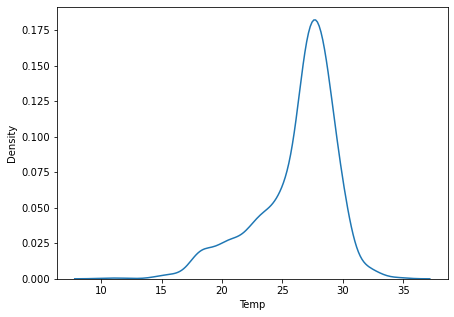

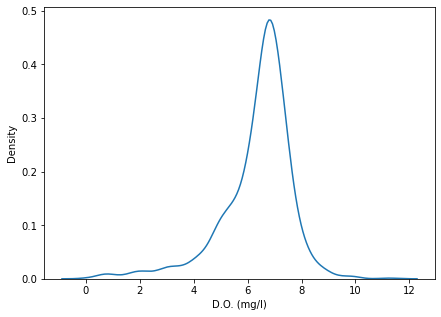

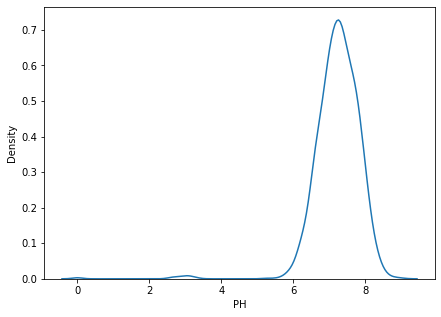

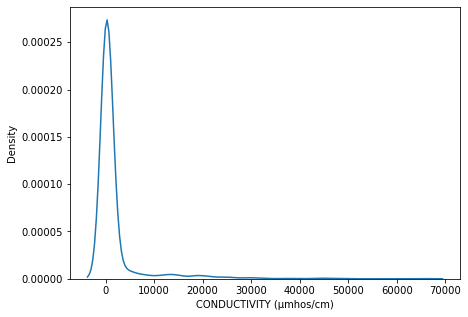

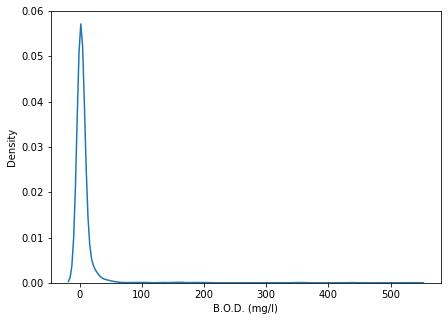

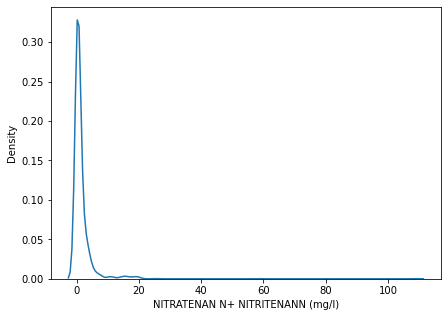

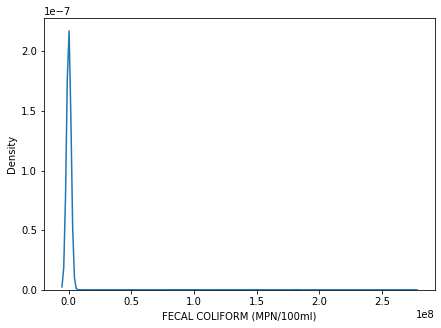

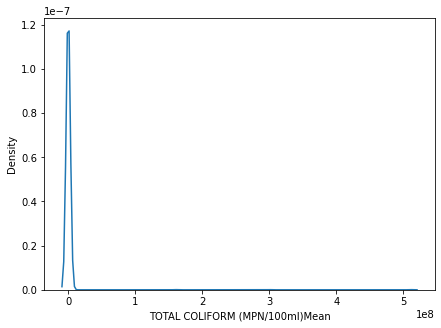

In [39]:

def plot_kde(df):
    n_col = df.shape[1]
    for index in range(n_col):
        col_index = df.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=df, x=col_index.name)
        
plot_kde(dataset_final)

In [40]:
df_num_final_norm = zscore(dataset_final, axis=0)


def indices_of_greater_than_3(df_norm):
    indices_arr = []
    n_col = df_norm.shape[1]
    for index in range(n_col):
        col_index = df_norm.iloc[: ,index]
        greater_than_3 = df_norm[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(df_num_final_norm)
print("Number of outliers using Z-Score method-",len(indices_arr))
dataset_final.iloc[indices_arr, :]

Number of outliers using Z-Score method- 124


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
741,28.0,8.2,7.6,112.0,2.1,0.52,233.0,31.0
745,30.0,9.3,7.6,193.0,2.3,0.52,233.0,41.0
37,25.3,5.3,7.7,24062.0,9.9,1.20,156.0,304.0
88,26.3,3.7,7.7,32005.0,1.2,0.90,40000.0,60392.0
108,30.0,5.6,7.2,24360.0,2.1,0.30,92.0,447.0
...,...,...,...,...,...,...,...,...
432,23.3,5.5,7.2,636.0,9.7,4.00,1328.0,4975.0
685,21.0,5.5,7.4,635.0,8.8,5.08,1400.0,5500.0
172,24.3,0.9,7.6,2039.0,104.5,0.90,272521616.0,511090873.0
432,23.3,5.5,7.2,636.0,9.7,4.00,1328.0,4975.0


In [41]:
dataset_final.shape

(1897, 8)

In [42]:
dataset_final = dataset_final.drop('Temp', axis = 1)

In [43]:
dataset_final.describe()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1.897000e+03,1.897000e+03
mean,6.358813,7.228101,1853.228482,6.698743,1.543983,3.195046e+05,5.195576e+05
std,1.335221,0.649539,5641.196919,27.305497,3.955007,8.236472e+06,1.409048e+07
min,0.000000,0.000000,11.000000,0.100000,0.000000,0.000000e+00,0.000000e+00
25%,5.900000,6.900000,88.000000,1.200000,0.270000,4.900000e+01,1.140000e+02
50%,6.700000,7.300000,198.000000,1.900000,0.520000,2.330000e+02,4.650000e+02
75%,7.100000,7.600000,619.000000,3.600000,1.280000,7.060000e+02,1.700000e+03
max,11.400000,9.010000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08


In [44]:
import numpy as np
from sklearn.decomposition import PCA


# compute the correlation matrix
corr_matrix = np.corrcoef(dataset_final.T)

# perform PCA
pca = PCA(n_components=6)
pca.fit(corr_matrix)

# get the explained variance ratio and the weights
explained_var_ratio = pca.explained_variance_ratio_
weights = pca.components_[0]

# print the weights
print("Weights assigned by PCA:")
print(weights)

Weights assigned by PCA:
[-0.33102374 -0.16788272 -0.08648319  0.17824527 -0.0638653   0.64029028
  0.63948224]


In [45]:
import numpy as np
from sklearn.decomposition import NMF

# define the water quality parameters



# apply NMF with 3 components
nmf = NMF(n_components=7, init='random', random_state=0)
W = nmf.fit_transform(dataset_final)
H = nmf.components_

# calculate the WQI weights
weights = H.sum(axis=1) / H.sum()

# print the weights for each parameter
for i in range(0,7):
    print(weights[i])


0.11740970417648669
0.027708468586179556
0.05220376720051314
0.2415986516332395
0.33904445757557805
0.10637297528923957
0.11566197553876341


In [46]:

def calculate_wqi(row):
   #Given parameter weights
   w_bod =0.24159865163321156
   w_do =0.11740970417648633
   w_ph = 0.02770846858617935
   w_cond = 0.052203767200512806
   w_nitrate = 0.33904445757558654
   w_fc = 0.10637297528923939
   w_tc = 0.11566197553878396
#    w_t = 0.033561552386545755
#    w_do =0.002165595568796463
#    w_ph =0.0040535518965382775
#    w_cond =0.7218823874496574
#    w_bod =0.17219478706860095
#    w_nitrate = 0.006089864166286124
#    w_fc =0.05365444052723535
#    w_tc =0.006397820936339693

    
   # Ideal values
   temp_t = 20.0 # deg C
   bod_t = 0.0 # mg/L
   do_t = 14.6 # mg/L
   ph_t = 7.0
   cond_t = 0.0 # uS/cm
   nitrate_t = 0.0 # mg/L
   fc_t = 0.0 # MPN/100 mL
   tc_t = 0.0 # MPN/100 mL
 
   # Standard values
   temp_u = 35.0 # deg C
   bod_u = 5.0 # mg/L
   do_u = 10.0 # mg/L
   ph_u = 8.5
   cond_u = 1000.0 # uS/cm
   nitrate_u = 45.0 # mg/L
   fc_u = 1000.0 # MPN/100 mL
   tc_u = 5000.0 # MPN/100 mL

#    temp = row['Temp'] # deg C
   bod = row['B.O.D. (mg/l)'] # mg/L
   do = row['D.O. (mg/l)'] # mg/L
   ph = row['PH']
   cond = row['CONDUCTIVITY (µmhos/cm)'] # uS/cm
   nitrate = row['NITRATENAN N+ NITRITENANN (mg/l)'] # mg/L
   fc =  row['FECAL COLIFORM (MPN/100ml)'] 
   tc = row['TOTAL COLIFORM (MPN/100ml)Mean']

# Calculate sub-indices (si) for each parameter

#    si_temp = ((abs(temp - temp_t) / (temp_u - temp_t)) * 100)
   si_bod = (((bod / bod_u) * 100)if bod < bod_u else 100)
   si_do = ((abs(do - do_t) / abs(do_u - do_t)) * 100)
   si_ph = (((abs(ph - ph_t) / abs(ph_u - ph_t)) * 100))
   si_cond = ((abs(cond - cond_t) / abs(cond_u - cond_t)) * 100 if cond < cond_u else 100)
   si_nitrate = (((nitrate / nitrate_u) * 100)if nitrate < nitrate_u else 100)
   si_fc = (((fc / fc_u) * 100)if fc < fc_u else 100)
   si_tc = (((tc / tc_u) * 100)if tc < tc_u else 100)

# Calculate weighted water quality index (wqi)
   wqi = (w_bod * si_bod) + (w_do * si_do) + (w_ph * si_ph) + (w_cond * si_cond) + (w_nitrate * si_nitrate) + (w_fc * si_fc) + (w_tc * si_tc)
   return wqi
  

In [47]:
# dataset_final = dataset_final.drop('Temp', axis = 1)

In [48]:

# def calculate_wqi(row):
  
#    w_do = 0.2213
#    w_ph = 0.2604
#    w_cond =0.0022
#    w_bod = 0.4426
#    w_nitrate = 0.0492
#    w_fc = 0.0221
#    w_tc = 0.0022

    
#    # Ideal values
#    temp_t = 20.0 # deg C
#    bod_t = 0.0 # mg/L
#    do_t = 14.6 # mg/L
#    ph_t = 7.0
#    cond_t = 0.0 # uS/cm
#    nitrate_t = 0.0 # mg/L
#    fc_t = 0.0 # MPN/100 mL
#    tc_t = 0.0 # MPN/100 mL
 
#    # Standard values
#    temp_u = 35.0 # deg C
#    bod_u = 5.0 # mg/L
#    do_u = 10.0 # mg/L
#    ph_u = 8.5
#    cond_u = 1000.0 # uS/cm
#    nitrate_u = 45.0 # mg/L
#    fc_u = 1000.0 # MPN/100 mL
#    tc_u = 5000.0 # MPN/100 mL

#   #  temp = row['Temp'] # deg C
#    bod = row['B.O.D. (mg/l)'] # mg/L
#    do = row['D.O. (mg/l)'] # mg/L
#    ph = row['PH']
#    cond = row['CONDUCTIVITY (µmhos/cm)'] # uS/cm
#    nitrate = row['NITRATENAN N+ NITRITENANN (mg/l)'] # mg/L
#    fc =  row['FECAL COLIFORM (MPN/100ml)'] 
#    tc = row['TOTAL COLIFORM (MPN/100ml)Mean']

# # Calculate sub-indices (si) for each parameter

#   #  si_temp = ((abs(temp - temp_t) / (temp_u - temp_t)) * 100)
#    si_bod = (((bod / bod_u) * 100)if bod < bod_u else 100)
#    si_do = ((abs(do - do_t) / abs(do_u - do_t)) * 100)
#    si_ph = (((abs(ph - ph_t) / abs(ph_u - ph_t)) * 100))
#    si_cond = ((abs(cond - cond_t) / abs(cond_u - cond_t)) * 100 if cond < cond_u else 100)
#    si_nitrate = (((nitrate / nitrate_u) * 100)if nitrate < nitrate_u else 100)
#    si_fc = (((fc / fc_u) * 100)if fc < fc_u else 100)
#    si_tc = (((tc / tc_u) * 100)if tc < tc_u else 100)

# # Calculate weighted water quality index (wqi)
#    wqi = (w_bod * si_bod) + (w_do * si_do) + (w_ph * si_ph) + (w_cond * si_cond) + (w_nitrate * si_nitrate) + (w_fc * si_fc) + (w_tc * si_tc)
#    return wqi
  

In [49]:
wqi = []
for i in range(0,len(dataset_final)):
  wqi.append(calculate_wqi(dataset_final.iloc[i]))

dataset_final['WQI'] = wqi

In [50]:
dataset_final.head()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI
0,6.7,7.5,203.0,1.9,0.1,11.0,27.0,31.582752
1,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,56.090450
2,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,52.797157
3,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,63.921523
4,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,55.134064


In [51]:
dataset_final.describe()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI
count,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1.897000e+03,1.897000e+03,1897.000000
mean,6.358813,7.228101,1853.228482,6.698743,1.543983,3.195046e+05,5.195576e+05,43.617565
std,1.335221,0.649539,5641.196919,27.305497,3.955007,8.236472e+06,1.409048e+07,15.644589
min,0.000000,0.000000,11.000000,0.100000,0.000000,0.000000e+00,0.000000e+00,16.953799
25%,5.900000,6.900000,88.000000,1.200000,0.270000,4.900000e+01,1.140000e+02,31.840993
50%,6.700000,7.300000,198.000000,1.900000,0.520000,2.330000e+02,4.650000e+02,39.467342
75%,7.100000,7.600000,619.000000,3.600000,1.280000,7.060000e+02,1.700000e+03,50.357878
max,11.400000,9.010000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,99.109260


In [52]:
dataset_final.shape

(1897, 8)

In [53]:
dataset_final.head()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI
0,6.7,7.5,203.0,1.9,0.1,11.0,27.0,31.582752
1,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,56.090450
2,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,52.797157
3,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,63.921523
4,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,55.134064


In [54]:
dataset_neg_indices = dataset_final[(dataset_final["WQI"] < 0)].index
dataset_final.drop(dataset_neg_indices, axis=0, inplace=True)

In [55]:
dataset_final.columns

Index(['D.O. (mg/l)', 'PH', 'CONDUCTIVITY (µmhos/cm)', 'B.O.D. (mg/l)',
       'NITRATENAN N+ NITRITENANN (mg/l)', 'FECAL COLIFORM (MPN/100ml)',
       'TOTAL COLIFORM (MPN/100ml)Mean', 'WQI'],
      dtype='object')

In [56]:
dataset_final["WQI clf"] = dataset_final['WQI'].apply(lambda x: (4 if (x <= 25)  
                                        else(3 if (26<=x<=50) 
                                        else(2 if (51<=x<=75) 
                                        else 1))))

In [57]:
dataset_final['WQI clf'].describe()

count    1897.000000
mean        2.637849
std         0.704193
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WQI clf, dtype: float64

In [58]:
dataset_final['WQI clf'].value_counts()

3    1335
2     311
1     209
4      42
Name: WQI clf, dtype: int64

In [59]:
y=dataset_final['WQI clf']
X=dataset_final.drop(['WQI clf', 'WQI'], axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit(X).transform(X)

# Feature Selection

In [61]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

features=[]
r2=[]

def iter_1(i):
  selector = SelectKBest(f_classif, k=i)
  selector.fit(X, y)
  X_=selector.transform(X)
  train_X, test_X, train_y, test_y = train_test_split(X_, y, test_size = 0.30, random_state = 0)
  model=RandomForestRegressor()
  model.fit(train_X,train_y)
  prediction=model.predict(test_X)
  r2score=r2_score(test_y,prediction)
  r2.append(r2score)
  features.append(i)

In [62]:
for i in range(2,X.shape[1]):
  iter_1(i)

In [63]:
r2_df = pd.DataFrame(r2)
feat_df=pd.DataFrame(features)

pd.concat([r2_df, feat_df], axis=1)

,0,0
0,0.389595,2
1,0.555417,3
2,0.533965,4
3,0.568937,5
4,0.660914,6


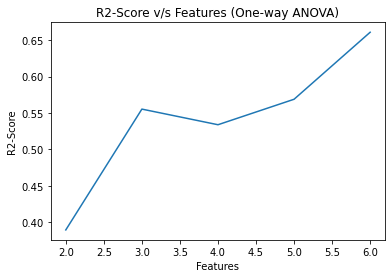

In [64]:
plt.plot(features, r2)
plt.xlabel('Features')
plt.ylabel('R2-Score')
plt.title('R2-Score v/s Features (One-way ANOVA)')
  
plt.show()
# hence no point of feature selection, the graph is increasing

## OverSampling

In [65]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:
# check version number
import imblearn
print(imblearn.__version__)

0.9.1


Class=2, n=1335 (25.000%)
Class=1, n=1335 (25.000%)
Class=0, n=1335 (25.000%)
Class=3, n=1335 (25.000%)


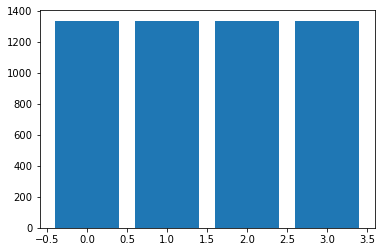

In [67]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [68]:
X.shape

(5340, 7)

In [69]:
np.count_nonzero(y == 0)

1335

# Classification

## Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

In [71]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       390
           1       0.72      0.45      0.55       398
           2       0.57      0.72      0.64       403
           3       0.76      0.90      0.82       411

    accuracy                           0.68      1602
   macro avg       0.69      0.68      0.67      1602
weighted avg       0.69      0.68      0.67      1602

0.6785268414481898
[[248  37  56  49]
 [ 95 179 121   3]
 [ 11  33 292  67]
 [  0   0  43 368]]


## KNN

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit(X).transform(X)

from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(X_train,y_train)
result=k.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       390
           1       0.72      0.45      0.55       398
           2       0.57      0.72      0.64       403
           3       0.76      0.90      0.82       411

    accuracy                           0.68      1602
   macro avg       0.69      0.68      0.67      1602
weighted avg       0.69      0.68      0.67      1602

0.6785268414481898
[[248  37  56  49]
 [ 95 179 121   3]
 [ 11  33 292  67]
 [  0   0  43 368]]


## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
m=GaussianNB()
m.fit(X_train, y_train)
pred3=m.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       390
           1       0.72      0.45      0.55       398
           2       0.57      0.72      0.64       403
           3       0.76      0.90      0.82       411

    accuracy                           0.68      1602
   macro avg       0.69      0.68      0.67      1602
weighted avg       0.69      0.68      0.67      1602

0.6785268414481898
[[248  37  56  49]
 [ 95 179 121   3]
 [ 11  33 292  67]
 [  0   0  43 368]]


## DecisionTreeClassifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_train,y_train)
y_pred=d.predict(X_test)

In [78]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       390
           1       0.93      0.97      0.95       398
           2       0.95      0.92      0.93       403
           3       0.98      1.00      0.99       411

    accuracy                           0.95      1602
   macro avg       0.94      0.94      0.94      1602
weighted avg       0.94      0.95      0.94      1602

0.9450686641697877
[[348  18  15   9]
 [  8 386   4   0]
 [ 22  10 370   1]
 [  0   0   1 410]]





## Random Forest



In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       390
           1       0.95      0.99      0.97       398
           2       0.95      0.97      0.96       403
           3       0.98      1.00      0.99       411

    accuracy                           0.97      1602
   macro avg       0.97      0.96      0.96      1602
weighted avg       0.97      0.97      0.96      1602

0.9650436953807741
[[351  16  16   7]
 [  3 393   2   0]
 [  4   5 392   2]
 [  0   0   1 410]]


## GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       390
           1       0.91      0.96      0.94       398
           2       0.95      0.94      0.94       403
           3       0.97      1.00      0.99       411

    accuracy                           0.94      1602
   macro avg       0.94      0.94      0.94      1602
weighted avg       0.94      0.94      0.94      1602

0.9431960049937578
[[338  27  17   8]
 [ 10 383   5   0]
 [ 10  11 379   3]
 [  0   0   0 411]]


# Support Vector Classifier

In [83]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73       390
           1       0.72      0.70      0.71       398
           2       0.58      0.63      0.60       403
           3       0.73      0.92      0.82       411

    accuracy                           0.72      1602
   macro avg       0.74      0.71      0.71      1602
weighted avg       0.73      0.72      0.71      1602

0.715980024968789
[[237  49  57  47]
 [ 15 280  96   7]
 [  7  61 252  83]
 [  0   0  33 378]]
